<a href="https://colab.research.google.com/github/henriquemin/portfolio_data_science/blob/master/Diabetes_Prediction_DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Diabetes Prediction DS Project

## **Business Problem**

The objective is to predict whether or not a patient has diabetes, based on diagnostic measurements included in the dataset.
All patients in the dataset are female of Pima Indian heritage.

**Columns:**

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0




## **Exploratory Data Analysis (EDA)**
---

### Import Libraries







In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io

### Load file & Data preparation







In [0]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunct", "Age", "Diabetes"]

df_initial = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']), header=0, names=column_names)


In [0]:
df_initial.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunct,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



### Identifying Features & Labels

In [0]:
# Dataset info
display(df_initial.info())
print('\n')

# Descriptive statistics of the data
display(df_initial.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies              768 non-null int64
Glucose                  768 non-null int64
BloodPressure            768 non-null int64
SkinThickness            768 non-null int64
Insulin                  768 non-null int64
BMI                      768 non-null float64
DiabetesPedigreeFunct    768 non-null float64
Age                      768 non-null int64
Diabetes                 768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunct,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Missing Value Identification

In [0]:
# Identify null values on dataset
print ('-' * 10 + " Display information about column types and number of null values " + '-' * 10 )

tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
tab_info = tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.rename(index={0:'null values (%)'}))

if(any(df_initial.isnull().any())):
    print()
    display(tab_info)
else:
    print('NO missing data')


---------- Display information about column types and number of null values ----------
NO missing data


In [0]:
# Checking diagnostic measurements, there are "0" as a result but is not possible to consider a "0" diagnosis as it will affect the prediction models

#Let's check the 'hide' missing values 
print("Dataframe total rows                  : {0}" .format(len(df_initial)))
print("Glucose rows missing                  : {0}" .format(len(df_initial.loc[df_initial['Glucose'] == 0])))
print("BloodPressure rows missing            : {0}" .format(len(df_initial.loc[df_initial['BloodPressure'] == 0])))
print("SkinThickness rows missing            : {0}" .format(len(df_initial.loc[df_initial['SkinThickness'] == 0])))
print("Insulin rows missing                  : {0}" .format(len(df_initial.loc[df_initial['Insulin'] == 0])))
print("BMI rows missing                      : {0}" .format(len(df_initial.loc[df_initial['BMI'] == 0])))
print("DiabetesPedigreeFunct rows missing    : {0}" .format(len(df_initial.loc[df_initial["DiabetesPedigreeFunct"] ==0])))
print("Age rows missing                      : {0}" .format(len(df_initial.loc[df_initial['Age'] == 0])))

# This dataset don`t have missing values, but there are zero values on columns: ['Glucose'], ['BloodPressure'], ['SkinThickness'], ['Insulin'], ['BMI']

Dataframe total rows                  : 768
Glucose rows missing                  : 5
BloodPressure rows missing            : 35
SkinThickness rows missing            : 227
Insulin rows missing                  : 374
BMI rows missing                      : 11
DiabetesPedigreeFunct rows missing    : 0
Age rows missing                      : 0


In [0]:
# Check which statistical to fill 'hide' null values:
age_cut1= pd.cut(df_initial['Glucose'], bins = 5).value_counts().sort_index()
age_cut2= pd.cut(df_initial['BloodPressure'], bins = 5).value_counts().sort_index()
age_cut3= pd.cut(df_initial['Insulin'], bins = 5).value_counts().sort_index()
age_cut4= pd.cut(df_initial['BMI'], bins = 5).value_counts().sort_index()

mean1 = int(df_initial['Glucose'].mean())
median1 = int(df_initial['Glucose'].median())

mean2 = int(df_initial['BloodPressure'].mean())
median2 = int(df_initial['BloodPressure'].median())

mean3 = int(df_initial['Insulin'].mean())
median3 = int(df_initial['Insulin'].median())

mean4 = int(df_initial['BMI'].mean())
median4 = int(df_initial['BMI'].median())

print('\n -------------------------------------------')
print(age_cut1)
print('\n')
print('The Glucose mean is {}' .format(mean1) + ' and ' + 'median is {}' .format(median1))
print('Reference: Normal Level: < 100 / Prediabetes: 100 to 125')
print('--------------------------------------------')

print('\n -------------------------------------------')
print(age_cut2)
print('\n')
print('The mean BloodPressure is {}' .format(mean2)  + ' and ' + 'median is {}' .format(median2))
print('--------------------------------------------')

print('\n -------------------------------------------')
print(age_cut3)
print('\n')
print('The mean Insulin is {}' .format(mean3) + ' and ' + 'median is {}' .format(median3))
print('--------------------------------------------')

print('\n -------------------------------------------')
print(age_cut4)
print('\n')
print('The mean BMI is {}' .format(mean4) + ' and ' + 'median is {}' .format(median4))
print('--------------------------------------------')

# With the results, I'm going to use the 'mean' for update the 'hide' missing values


 -------------------------------------------
(-0.199, 39.8]      5
(39.8, 79.6]       36
(79.6, 119.4]     367
(119.4, 159.2]    258
(159.2, 199.0]    102
Name: Glucose, dtype: int64


The Glucose mean is 120 and median is 117
Reference: Normal Level: < 100 / Prediabetes: 100 to 125
--------------------------------------------

 -------------------------------------------
(-0.122, 24.4]     36
(24.4, 48.8]       15
(48.8, 73.2]      368
(73.2, 97.6]      330
(97.6, 122.0]      19
Name: BloodPressure, dtype: int64


The mean BloodPressure is 69 and median is 72
--------------------------------------------

 -------------------------------------------
(-0.846, 169.2]    642
(169.2, 338.4]     100
(338.4, 507.6]      17
(507.6, 676.8]       6
(676.8, 846.0]       3
Name: Insulin, dtype: int64


The mean Insulin is 79 and median is 30
--------------------------------------------

 -------------------------------------------
(-0.0671, 13.42]     11
(13.42, 26.84]      171
(26.84, 40.26]   

### Exploring data attributes

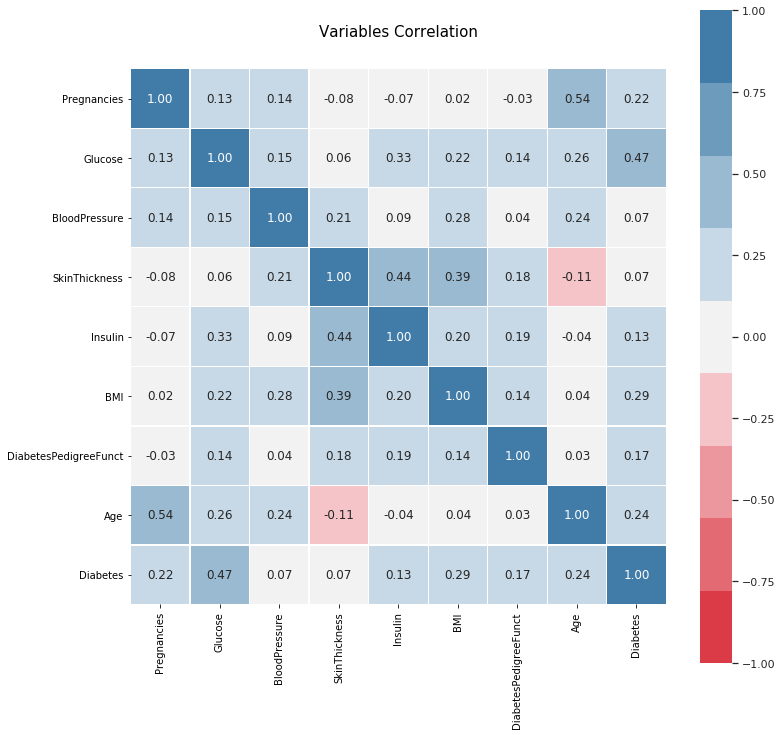

In [0]:
# Heatmap, to identify the correlation between the features. Obs: Correlation do not shows causation
corr = df_initial.corr()

plt.figure(figsize=(12,12))
plt.title('Variables Correlation', y=1.05, size=15)
sns.set(font_scale=1)

ax = sns.heatmap(corr, fmt= '.2f',linewidths=0.3, vmin= -1,vmax=1.0, square=True, cmap= sns.diverging_palette(10, 240, n=9), linecolor='white', annot=True);


In [0]:
# Check the distribution of the dataset
num_true = len(df_initial.loc[df_initial['Diabetes'] == 1])
num_false = len(df_initial.loc[df_initial['Diabetes'] == 0])

print("Number of True Cases of Diabetes: {0} ({1:2.2f}%)" .format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False Cases of Diabetes: {0} ({1:2.2f}%)" .format(num_false, (num_false / (num_true + num_false)) * 100))


Number of True Cases of Diabetes: 268 (34.90%)
Number of False Cases of Diabetes: 500 (65.10%)


### Pandas Profiling (Speedup EDA)

In [0]:
# pip install pandas-profiling
#!pip install --upgrade pandas_profiling
from pandas_profiling import ProfileReport

In [0]:
# Create the structure of the ProfilingReport
profile = ProfileReport(df_initial)
profile

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,9
Number of observations,768
Total Missing (%),0.0%
Total size in memory,54.1 KiB
Average record size in memory,72.2 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


## **Machine Learning Algorithm**
---

## Constants




In [0]:
# Defining constants will help to 
USE_COLS = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunct', 'Age', 'Diabetes']
TEST_SIZE = 0.2         # train_test_split, definition of test size
RANDOM_SEED = 42        # train_test_split, log_reg, svc, kfold
STRATEGY_NUM = 'mean'   # imput_missing_num
N_SPLITS = 10           # kfold
SCORING = 'accuracy'    # cross-validation model

## Preparing the dataset to Machine Learning




In [0]:
diabetes_historic = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']), header=0, names= USE_COLS)
diabetes_historic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunct,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Train_Test_Split of the dataset
It will separate the data between Train and Test datasets




In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Features and labels selection
X_1 = diabetes_historic.drop(columns='Diabetes')   # Select all columns, except 'Diabetes' # FOR MACHINE LEARNING OPTION 1
y_1 = diabetes_historic.loc[:, 'Diabetes']         # Select [all rows, column 'Diabetes']  # FOR MACHINE LEARNING OPTION 1

X_2 = diabetes_historic.drop(columns='Diabetes')   # Select all columns, except 'Diabetes' # FOR MACHINE LEARNING OPTION 2
y_2 = diabetes_historic.loc[:, 'Diabetes']         # Select [all rows, column 'Diabetes']  # FOR MACHINE LEARNING OPTION 2

In [0]:
# Create the train and test data
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = TEST_SIZE, random_state = RANDOM_SEED) # FOR MACHINE LEARNING OPTION 1
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = TEST_SIZE, random_state = RANDOM_SEED) # FOR MACHINE LEARNING OPTION 1

print("{0:0.2f}% on train data" .format((len(X_1_train) / len(df_initial.index)) * 100))
print("{0:0.2f}% on test data" .format((len(X_1_test) / len(df_initial.index)) * 100))

79.95% on train data
20.05% on test data


## Checking Split values 





In [0]:
print("Original True: {0} ({1:0.2f}%)" .format(len(df_initial.loc[df_initial['Diabetes'] == 1]), len(df_initial.loc[df_initial['Diabetes'] == 1]) / len(df_initial.index) * 100))
print("Original False: {0} ({1:0.2f}%)" .format(len(df_initial.loc[df_initial['Diabetes'] == 0]), len(df_initial.loc[df_initial['Diabetes'] == 0]) / len(df_initial.index) * 100))

print("")
print("Train True: {0} ({1:0.2f}%)" .format(len(y_1_train[y_1_train[:] == 1]), len(y_1_train[y_1_train[:] == 1]) / len(y_1_train) * 100))
print("Train False: {0} ({1:0.2f}%)" .format(len(y_1_train[y_1_train[:] == 0]), len(y_1_train[y_1_train[:] == 0]) / len(y_1_train) * 100 ))

print("")
print("Test True: {0} ({1:0.2f}%)" .format(len(y_2_train[y_2_train[:] == 1]), len(y_2_train[y_2_train[:] == 1]) / len(y_2_train) * 100))
print("Test False: {0} ({1:0.2f}%)". format(len(y_2_train[y_2_train[:] == 0]), len(y_2_train[y_2_train[:] == 0]) / len(y_2_train) * 100))

Original True: 268 (34.90%)
Original False: 500 (65.10%)

Train True: 213 (34.69%)
Train False: 401 (65.31%)

Test True: 213 (34.69%)
Test False: 401 (65.31%)


## Hide Missing Values Treatment







In [0]:
# Considering diagnostic measurements, we cannot consider "0" as a result, 
# as is not possible to have a "0" diagnosis

#Let's review the hide missing values 
print("Dataframe total rows                  : {0}" .format(len(diabetes_historic)))
print("Glucose rows missing                  : {0}" .format(len(diabetes_historic.loc[diabetes_historic['Glucose'] == 0])))
print("BloodPressure rows missing            : {0}" .format(len(diabetes_historic.loc[diabetes_historic['BloodPressure'] == 0])))
print("SkinThickness rows missing            : {0}" .format(len(diabetes_historic.loc[diabetes_historic['SkinThickness'] == 0])))
print("Insulin rows missing                  : {0}" .format(len(diabetes_historic.loc[diabetes_historic['Insulin'] == 0])))
print("BMI rows missing                      : {0}" .format(len(diabetes_historic.loc[diabetes_historic['BMI'] == 0])))
print("DiabetesPedigreeFunct rows missing    : {0}" .format(len(diabetes_historic.loc[diabetes_historic["DiabetesPedigreeFunct"] ==0])))
print("Age rows missing                      : {0}" .format(len(diabetes_historic.loc[diabetes_historic['Age'] == 0])))

Dataframe total rows                  : 768
Glucose rows missing                  : 5
BloodPressure rows missing            : 35
SkinThickness rows missing            : 227
Insulin rows missing                  : 374
BMI rows missing                      : 11
DiabetesPedigreeFunct rows missing    : 0
Age rows missing                      : 0


## **Building the Machine Learning algorithms & Cross-Validation**



# Option 1: using Pipelines
---

In [0]:
# Let's create a numerical transformer to change the zero values on the columns above:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # SS: Standardize features of the dataset into a standard normal distribution / OHE: change the str value into int(0,1,2,..)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline                            # Reduce dimensionality of the features and then use a estimator

# numerical transformers
cols_num = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']     # selecting the column that has num values
imput_missing_num = SimpleImputer(missing_values = 0, strategy = STRATEGY_NUM)  # if missing value = 0, it will imput the strategy selected
scaler_num = StandardScaler()                                                   # Standardize features of the dataset into a standard normal distribution
pipe_num = Pipeline([                                                            # instantiate a numerical pipeline to do the num_pre_processing step as a tuple
                     ('Imput_Missing_Num', imput_missing_num),
                     ('Scaler_num', scaler_num)
                    ])

In [0]:
# define a preprocessor: it will change the values of the columns
preprocessor = ColumnTransformer([
                                  ('Trans_num', pipe_num, cols_num)
                                 ], remainder = 'passthrough')

print('\n\n')
print(X_1_train)
print(preprocessor.fit_transform(X_1_train))




     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunct  Age
60             2       84              0  ...   0.0                  0.304   21
618            9      112             82  ...  28.2                  1.282   50
346            1      139             46  ...  28.7                  0.654   22
294            0      161             50  ...  21.9                  0.254   65
231            6      134             80  ...  46.2                  0.238   46
..           ...      ...            ...  ...   ...                    ...  ...
71             5      139             64  ...  28.6                  0.411   26
106            1       96            122  ...  22.4                  0.207   27
270           10      101             86  ...  45.6                  1.136   38
435            0      141              0  ...  42.4                  0.205   29
102            0      125             96  ...  22.5                  0.262   21

[614 rows x 8 columns]
[[-1.25832567

In [0]:
# import libraries to machine learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score       # Cross validation
from sklearn.metrics import accuracy_score

gaussian_nb = GaussianNB()
random_forest = RandomForestClassifier(random_state = RANDOM_SEED)
log_reg = LogisticRegression(max_iter = 200,random_state = RANDOM_SEED)

# defining the cross-validation model (Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.)
kfold= KFold(n_splits = N_SPLITS, shuffle = True, random_state = RANDOM_SEED)   # splits the data into n groups, shuffle randomnly the data

## Evaluation of the model with Pipeline


In [0]:
# cross-validation
tuple_models = (('gaussian_nb', gaussian_nb), ('random_forest', random_forest), ('Log_reg', log_reg))

for name, model in tuple_models:
  pipe = Pipeline([('Preprocessor', preprocessor), ('Model', model)])           #Pipeline to transform cols_num and cols_cat then join inside a estimator
  scores = cross_val_score(pipe, X_1_train, y_1_train, cv = kfold, scoring=SCORING)

  print('\n===========================================================')
  print(f'EVALUATING THE MODEL {name}, WITH CROSS-VAL {N_SPLITS} FOLDS')
  print(f'MEAN: {scores.mean()*100:.2f}%')
  print(f'STD DEVIATION: {scores.std()*100:.2f}%')

  print('-----------------------------------------------------------')
  pipe.fit(X_1_train, y_1_train)
  y_pred = pipe.predict(X_1_test)
  print(f'EVALUATING THE MODEL ON TEST DATA: {accuracy_score(y_1_test,y_pred)*100:.2f}%')


EVALUATING THE MODEL gaussian_nb, WITH CROSS-VAL 10 FOLDS
MEAN: 73.77%
STD DEVIATION: 4.34%
-----------------------------------------------------------
EVALUATING THE MODEL ON TEST DATA: 75.32%

EVALUATING THE MODEL random_forest, WITH CROSS-VAL 10 FOLDS
MEAN: 75.57%
STD DEVIATION: 3.25%
-----------------------------------------------------------
EVALUATING THE MODEL ON TEST DATA: 75.97%

EVALUATING THE MODEL Log_reg, WITH CROSS-VAL 10 FOLDS
MEAN: 76.54%
STD DEVIATION: 4.89%
-----------------------------------------------------------
EVALUATING THE MODEL ON TEST DATA: 75.32%


# Option 2: building models separately
---

## **Building and train the model Naive Bayes**







In [0]:
# Create Object to change 0 values to mean of each column
imp = SimpleImputer(missing_values= 0, strategy='mean')

X_2_train = imp.fit_transform(X_2_train)
X_2_test = imp.fit_transform(X_2_test)

In [0]:
from sklearn.naive_bayes import GaussianNB

#Building the 1st model
model_v1 = GaussianNB()

model_v1.fit(X_2_train, y_2_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Check the accuracy on the train dataset
from sklearn import metrics

nb_predict_train = model_v1.predict(X_2_train)
print("Exatidão (Accuracy): {0:.4f}". format(metrics.accuracy_score(y_2_train, nb_predict_train)))


Exatidão (Accuracy): 0.7459


In [0]:
# Check the accuracy on the test dataset
nb_predict_test = model_v1.predict(X_2_test)
print("Exatidão (Accuracy): {0:.4f}" .format(metrics.accuracy_score(y_2_test,nb_predict_test)))

Exatidão (Accuracy): 0.7468


In [0]:
# Creating Confusion Matrix
print("Confusion Matrix")
print("{0}" .format(metrics.confusion_matrix(y_2_test, nb_predict_test, labels = [1,0])))

print("")
print("Classification Report")
print(metrics.classification_report(y_2_test, nb_predict_test, labels = [1,0]))

Confusion Matrix
[[39 16]
 [20 79]]

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.71      0.68        55
           0       0.83      0.80      0.81        99

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## **Building and train the model Random Forest**









In [0]:
from sklearn.ensemble import RandomForestClassifier

model_v2 = RandomForestClassifier(random_state = 42)
model_v2.fit(X_2_train, y_2_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Check the accuracy on the train dataset
rf_predict_train = model_v2.predict(X_2_train)

print("Exatidão (Accuracy): {0:.4f}" .format(metrics.accuracy_score(y_2_train, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [0]:
# Check the accuracy on the test dataset
rf_predict_test = model_v2.predict(X_2_test)
print("Exatidão (Accuracy): {0:.4f}" .format(metrics.accuracy_score(y_2_test, rf_predict_test)))

Exatidão (Accuracy): 0.7338


In [0]:
print("Confusion Matrix")
print("{0}" .format(metrics.confusion_matrix(y_2_test, rf_predict_test, labels = [1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_2_test, rf_predict_test, labels = [1,0]))

Confusion Matrix
[[37 18]
 [23 76]]

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.67      0.64        55
           0       0.81      0.77      0.79        99

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



## **Building and train the model Logistic Regression**









In [0]:
from sklearn.linear_model import LogisticRegression

model_v3 = LogisticRegression(C= 0.7, max_iter = 200)
model_v3.fit(X_2_train, y_2_train.ravel())
lr_predict_test = model_v3.predict(X_2_test)

In [0]:
print("Exatidão (accuracy): {0:.4f}" .format(metrics.accuracy_score(y_2_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_2_test, lr_predict_test, labels =[1,0]))

Exatidão (accuracy): 0.7468

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.67      0.65        55
           0       0.81      0.79      0.80        99

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# **Comparative of Results**
---








In [0]:
# Compare the results
print('Modelo Pipelines          : [gaussian_nb: 75.32%] , [random_forest: 75.97%] ,  [Log_reg 75.32%]')
print("Modelo Naive Bayes        : Exatidão (Accuracy): {0:.4f}" .format(metrics.accuracy_score(y_2_test, nb_predict_test)))
print("Modelo Random Forest      : Exatidão (Accuracy): {0:.4f}" .format(metrics.accuracy_score(y_2_test, rf_predict_test)))
print("Modelo Logistic Regression: Exatidão (accuracy): {0:.4f}" .format(metrics.accuracy_score(y_2_test, lr_predict_test)))


Modelo Pipelines          : [gaussian_nb: 75.32%] , [random_forest: 75.97%] ,  [Log_reg 75.32%]
Modelo Naive Bayes        : Exatidão (Accuracy): 0.7468
Modelo Random Forest      : Exatidão (Accuracy): 0.7338
Modelo Logistic Regression: Exatidão (accuracy): 0.7468


# **Predictions**
---









In [0]:
import pickle

### Option 1 - predictions

In [0]:
#----------------------------------------------------------------
# OPTION 1
#----------------------------------------------------------------

# Save the model that will use in prediction
predict_pipe = 'log_reg.sav'
pickle.dump(log_reg, open(predict_pipe, 'wb'))

In [0]:
# Do predictions with new dataset
load_model_1 = pickle.load(open(predict_pipe, 'rb'))

result_1 = load_model_1.predict(X_1_test)
#result_2 = load_model_1.predict(X_1_test[18].reshape(1, -1))

print("Prediction: {0}" .format(result_1))
#print("Predição de ser diabética é: {0}" .format(result_2))

Prediction: [1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0
 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 1 1 1]


### Option 2 - predictions

In [0]:
#----------------------------------------------------------------
# OPTION 2
#----------------------------------------------------------------

# Save the model that will use in prediction
predict_file = 'model_trained_v3.sav'
pickle.dump(model_v3, open(predict_file, 'wb'))

In [0]:
# Do predictions with new dataset
load_model_2 = pickle.load(open(predict_file, 'rb'))

result_1 = load_model_2.predict(X_2_test[5].reshape(1, -1))
result_2 = load_model_2.predict(X_2_test[18].reshape(1, -1))

print("Prediction of having diabetes is: {0}" .format(result_1))
print("Prediction of having diabetes is: {0}" .format(result_2))


Prediction of having diabetes is: [0]
Prediction of having diabetes is: [1]
